Perform the following operations using Python on census bureau databset(Adult data sets)

m. Data cleaning(Remove NA, ?, Negative values etc.)

n. Error correcting(Outlier detection and removal)

o. Data transformation

p. Build Data model using logistic regression and Naïve Bayes methods for prediction of income category (>=50k or <=50k) and compare accuracy Prediction.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
df=pd.read_csv('adult.csv',names= ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','realtionship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class'])

In [15]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,realtionship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [16]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
realtionship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [17]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,realtionship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [18]:
df.shape

(32561, 15)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   realtionship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
# df['age']=df['age'].astype(int)
# df['workclass']=df['workclass'].astype(str)
# df['fnlwgt']=df['fnlwgt'].astype(int)
# df['education']=df['education'].astype(str)
# df['education-num']=df['education-num'].astype(int)
# df['marital-status']=df['marital-status'].astype(str)
# df['occupation']=df['occupation'].astype(str)
# df['realtionship']=df['realtionship'].astype(str)
# df['race']=df['race'].astype(str)
# df['sex']=df['sex'].astype(str)
# df['capital-gain']=df['capital-gain'].astype(int)
# df['capital-loss']=df['capital-loss'].astype(int)
# df['hours-per-week']=df['hours-per-week'].astype(int)
# df['native-country']=df['native-country'].astype(str)
# df['class']=df['class'].astype(str)

In [19]:
df.loc[32562]=[39,np.nan,77516,' Bachelors',13,' Never-married',' Adm-clerical',' Not-in-family',np.nan,' Male',2174,0,40,' United-States',' <=50K']

In [20]:
df.loc[32563]=[np.nan,'Private',77,' Bachelors',np.nan,' Never-married',' Adm-clerical',' Not-in-family','white',' Male',2174,0,40,' United-States',' <=50K']

In [21]:
df.shape

(32563, 15)

In [22]:
df.isnull().sum()

age               1
workclass         1
fnlwgt            0
education         0
education-num     1
marital-status    0
occupation        0
realtionship      0
race              1
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32563 entries, 0 to 32563
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32562 non-null  float64
 1   workclass       32562 non-null  object 
 2   fnlwgt          32563 non-null  int64  
 3   education       32563 non-null  object 
 4   education-num   32562 non-null  float64
 5   marital-status  32563 non-null  object 
 6   occupation      32563 non-null  object 
 7   realtionship    32563 non-null  object 
 8   race            32562 non-null  object 
 9   sex             32563 non-null  object 
 10  capital-gain    32563 non-null  int64  
 11  capital-loss    32563 non-null  int64  
 12  hours-per-week  32563 non-null  int64  
 13  native-country  32563 non-null  object 
 14  class           32563 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 4.0+ MB


In [26]:
df['age']=df['age'].fillna(int(df['age'].mean()))

In [27]:
df.isnull().sum()

age               0
workclass         1
fnlwgt            0
education         0
education-num     1
marital-status    0
occupation        0
realtionship      0
race              1
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [34]:
df['education-num'].unique()

array([13.,  9.,  7., 14.,  5., 10., 12., 11.,  4., 16., 15.,  3.,  6.,
        2.,  1.,  8., nan])

In [41]:
df['education-num'].mode()[0]

9.0

In [35]:
df['education-num']=df['education-num'].fillna(df['education-num'].mode()[0])

In [36]:
df.isnull().sum()

age               0
workclass         1
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
realtionship      0
race              1
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [42]:
df=df.dropna()

In [43]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
realtionship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [44]:
df.shape

(32562, 15)

In [51]:
df[df.eq(" ?").any(1)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,realtionship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
14,40.0,Private,121772,Assoc-voc,11.0,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
27,54.0,?,180211,Some-college,10.0,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31.0,Private,84154,Some-college,10.0,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
51,18.0,Private,226956,HS-grad,9.0,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
61,32.0,?,293936,7th-8th,4.0,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35.0,?,320084,Bachelors,13.0,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30.0,?,33811,Bachelors,13.0,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71.0,?,287372,Doctorate,16.0,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41.0,?,202822,HS-grad,9.0,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [52]:
df=df[df['workclass']!=' ?']

In [53]:
df=df[df['occupation']!=' ?']

In [56]:
df=df[df['native-country']!=' ?']

In [57]:
df.shape

(30163, 15)

In [58]:
df['class'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [33]:
df['class']=df['class'].replace(' <=50K',0)
df['class']=df['class'].replace(' >50K',1)

In [34]:
df['class'].unique()

array([0, 1], dtype=int64)

In [35]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,class
age,1.000000,-0.076534,0.043484,0.080392,0.060409,0.101879,0.242430
fnlwgt,-0.076534,1.000000,-0.044025,-0.000197,-0.009997,-0.022805,-0.009411
education-num,0.043484,-0.044025,1.000000,0.124089,0.079118,0.150965,0.333896
capital-gain,0.080392,-0.000197,0.124089,1.000000,-0.032333,0.079547,0.221867
capital-loss,0.060409,-0.009997,0.079118,-0.032333,1.000000,0.053961,0.151464
hours-per-week,0.101879,-0.022805,0.150965,0.079547,0.053961,1.000000,0.228547
class,0.242430,-0.009411,0.333896,0.221867,0.151464,0.228547,1.000000


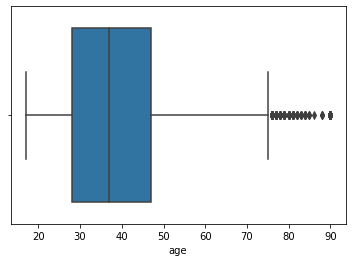

In [36]:
sns.boxplot(df['age'])

In [37]:
df.shape

(30719, 15)

In [38]:
df=df[df['age']<=75]

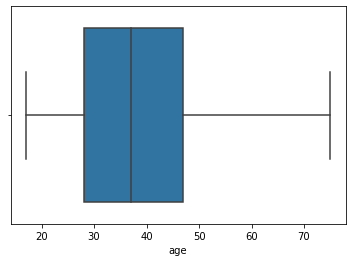

In [39]:
sns.boxplot(df['age'])

In [40]:
df.shape

(30547, 15)

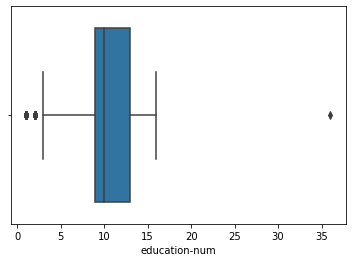

In [41]:
sns.boxplot(df['education-num'])

In [42]:
df=df[~((df['education-num']<=3) | (df['education-num']>=20))]

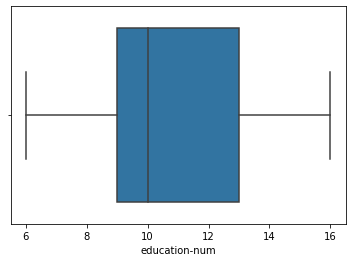

In [43]:
sns.boxplot(df['education-num'])

In [44]:
df.shape

(29040, 15)

In [45]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,realtionship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,50.0,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38.0,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53.0,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28.0,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37.0,Private,284582,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0


In [46]:
df['workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Local-gov',
       ' Federal-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [47]:
df=pd.concat([df,pd.get_dummies(df['workclass'])],1)

In [48]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,realtionship,race,sex,...,hours-per-week,native-country,class,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,50.0,Self-emp-not-inc,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,13,United-States,0,0,0,0,0,1,0,0
1,38.0,Private,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,40,United-States,0,0,0,1,0,0,0,0
2,53.0,Private,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,40,United-States,0,0,0,1,0,0,0,0
3,28.0,Private,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,40,Cuba,0,0,0,1,0,0,0,0
4,37.0,Private,284582,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,...,40,United-States,0,0,0,1,0,0,0,0


In [49]:
df=df.drop(['workclass',' Without-pay'],axis='columns')

In [50]:
df.head()

,age,fnlwgt,education,education-num,marital-status,occupation,realtionship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov
0,50.0,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,0,0,0,0,1,0
1,38.0,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,0,0,1,0,0,0
2,53.0,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,0,0,1,0,0,0
3,28.0,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,0,0,1,0,0,0
4,37.0,284582,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0,0,0,1,0,0,0


In [51]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' Some-college',
       ' Assoc-acdm', ' Assoc-voc', ' Doctorate', ' Prof-school', ' 10th',
       ' 12th'], dtype=object)

In [52]:
df=pd.concat([df,pd.get_dummies(df['education'])],1)

In [53]:
df.head()

,age,fnlwgt,education,education-num,marital-status,occupation,realtionship,race,sex,capital-gain,...,11th,12th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Prof-school,Some-college
0,50.0,83311,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,...,0,0,0,0,1,0,0,0,0,0
1,38.0,215646,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,...,0,0,0,0,0,0,1,0,0,0
2,53.0,234721,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,...,1,0,0,0,0,0,0,0,0,0
3,28.0,338409,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,...,0,0,0,0,1,0,0,0,0,0
4,37.0,284582,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,...,0,0,0,0,0,0,0,1,0,0


In [54]:
df=df.drop(['education',' Some-college'],axis='columns')

In [55]:
df.head()

,age,fnlwgt,education-num,marital-status,occupation,realtionship,race,sex,capital-gain,capital-loss,...,10th,11th,12th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Prof-school
0,50.0,83311,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,...,0,0,0,0,0,1,0,0,0,0
1,38.0,215646,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,...,0,0,0,0,0,0,0,1,0,0
2,53.0,234721,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,...,0,1,0,0,0,0,0,0,0,0
3,28.0,338409,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,...,0,0,0,0,0,1,0,0,0,0
4,37.0,284582,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,...,0,0,0,0,0,0,0,0,1,0


In [56]:
df['marital-status'].unique()

array([' Married-civ-spouse', ' Divorced', ' Never-married', ' Separated',
       ' Married-AF-spouse', ' Widowed', ' Married-spouse-absent'],
      dtype=object)

In [57]:
df=pd.concat([df,pd.get_dummies(df['marital-status'])],1)

In [58]:
df.head()

,age,fnlwgt,education-num,marital-status,occupation,realtionship,race,sex,capital-gain,capital-loss,...,HS-grad,Masters,Prof-school,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,50.0,83311,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,...,0,0,0,0,0,1,0,0,0,0
1,38.0,215646,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,...,1,0,0,1,0,0,0,0,0,0
2,53.0,234721,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,...,0,0,0,0,0,1,0,0,0,0
3,28.0,338409,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,...,0,0,0,0,0,1,0,0,0,0
4,37.0,284582,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,...,0,1,0,0,0,1,0,0,0,0


In [59]:
df=df.drop(['marital-status',' Widowed'],axis='columns')

In [60]:
df.head()

,age,fnlwgt,education-num,occupation,realtionship,race,sex,capital-gain,capital-loss,hours-per-week,...,Doctorate,HS-grad,Masters,Prof-school,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated
0,50.0,83311,13.0,Exec-managerial,Husband,White,Male,0,0,13,...,0,0,0,0,0,0,1,0,0,0
1,38.0,215646,9.0,Handlers-cleaners,Not-in-family,White,Male,0,0,40,...,0,1,0,0,1,0,0,0,0,0
2,53.0,234721,7.0,Handlers-cleaners,Husband,Black,Male,0,0,40,...,0,0,0,0,0,0,1,0,0,0
3,28.0,338409,13.0,Prof-specialty,Wife,Black,Female,0,0,40,...,0,0,0,0,0,0,1,0,0,0
4,37.0,284582,14.0,Exec-managerial,Wife,White,Female,0,0,40,...,0,0,1,0,0,0,1,0,0,0


In [61]:
df['occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Adm-clerical', ' Sales', ' Craft-repair', ' Farming-fishing',
       ' Machine-op-inspct', ' Other-service', ' Transport-moving',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [62]:
df=pd.concat([df,pd.get_dummies(df['occupation'])],1)

In [63]:
df.head()

,age,fnlwgt,education-num,occupation,realtionship,race,sex,capital-gain,capital-loss,hours-per-week,...,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,50.0,83311,13.0,Exec-managerial,Husband,White,Male,0,0,13,...,0,0,0,0,0,0,0,0,0,0
1,38.0,215646,9.0,Handlers-cleaners,Not-in-family,White,Male,0,0,40,...,0,1,0,0,0,0,0,0,0,0
2,53.0,234721,7.0,Handlers-cleaners,Husband,Black,Male,0,0,40,...,0,1,0,0,0,0,0,0,0,0
3,28.0,338409,13.0,Prof-specialty,Wife,Black,Female,0,0,40,...,0,0,0,0,0,1,0,0,0,0
4,37.0,284582,14.0,Exec-managerial,Wife,White,Female,0,0,40,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df=df.drop(['occupation',' Transport-moving'],axis='columns')

In [65]:
df.head()

,age,fnlwgt,education-num,realtionship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,...,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support
0,50.0,83311,13.0,Husband,White,Male,0,0,13,United-States,...,1,0,0,0,0,0,0,0,0,0
1,38.0,215646,9.0,Not-in-family,White,Male,0,0,40,United-States,...,0,0,1,0,0,0,0,0,0,0
2,53.0,234721,7.0,Husband,Black,Male,0,0,40,United-States,...,0,0,1,0,0,0,0,0,0,0
3,28.0,338409,13.0,Wife,Black,Female,0,0,40,Cuba,...,0,0,0,0,0,0,1,0,0,0
4,37.0,284582,14.0,Wife,White,Female,0,0,40,United-States,...,1,0,0,0,0,0,0,0,0,0


In [66]:
df['realtionship'].unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [67]:
df=pd.concat([df,pd.get_dummies(df['realtionship'])],1)

In [68]:
df.head()

,age,fnlwgt,education-num,realtionship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,...,Prof-specialty,Protective-serv,Sales,Tech-support,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,50.0,83311,13.0,Husband,White,Male,0,0,13,United-States,...,0,0,0,0,1,0,0,0,0,0
1,38.0,215646,9.0,Not-in-family,White,Male,0,0,40,United-States,...,0,0,0,0,0,1,0,0,0,0
2,53.0,234721,7.0,Husband,Black,Male,0,0,40,United-States,...,0,0,0,0,1,0,0,0,0,0
3,28.0,338409,13.0,Wife,Black,Female,0,0,40,Cuba,...,1,0,0,0,0,0,0,0,0,1
4,37.0,284582,14.0,Wife,White,Female,0,0,40,United-States,...,0,0,0,0,0,0,0,0,0,1


In [69]:
df=df.drop(['realtionship',' Wife'],axis='columns')

In [70]:
df.head()

,age,fnlwgt,education-num,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,...,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Husband,Not-in-family,Other-relative,Own-child,Unmarried
0,50.0,83311,13.0,White,Male,0,0,13,United-States,0,...,0,0,0,0,0,1,0,0,0,0
1,38.0,215646,9.0,White,Male,0,0,40,United-States,0,...,0,0,0,0,0,0,1,0,0,0
2,53.0,234721,7.0,Black,Male,0,0,40,United-States,0,...,0,0,0,0,0,1,0,0,0,0
3,28.0,338409,13.0,Black,Female,0,0,40,Cuba,0,...,0,1,0,0,0,0,0,0,0,0
4,37.0,284582,14.0,White,Female,0,0,40,United-States,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
df['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Other',
       ' Amer-Indian-Eskimo'], dtype=object)

In [72]:
df=pd.concat([df,pd.get_dummies(df['race'])],1)

In [73]:
df.head()

,age,fnlwgt,education-num,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,...,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,50.0,83311,13.0,White,Male,0,0,13,United-States,0,...,1,0,0,0,0,0,0,0,0,1
1,38.0,215646,9.0,White,Male,0,0,40,United-States,0,...,0,1,0,0,0,0,0,0,0,1
2,53.0,234721,7.0,Black,Male,0,0,40,United-States,0,...,1,0,0,0,0,0,0,1,0,0
3,28.0,338409,13.0,Black,Female,0,0,40,Cuba,0,...,0,0,0,0,0,0,0,1,0,0
4,37.0,284582,14.0,White,Female,0,0,40,United-States,0,...,0,0,0,0,0,0,0,0,0,1


In [74]:
df=df.drop(['race',' White'],axis='columns')

In [75]:
df.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,native-country,class,Federal-gov,...,Tech-support,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other
0,50.0,83311,13.0,Male,0,0,13,United-States,0,0,...,0,1,0,0,0,0,0,0,0,0
1,38.0,215646,9.0,Male,0,0,40,United-States,0,0,...,0,0,1,0,0,0,0,0,0,0
2,53.0,234721,7.0,Male,0,0,40,United-States,0,0,...,0,1,0,0,0,0,0,0,1,0
3,28.0,338409,13.0,Female,0,0,40,Cuba,0,0,...,0,0,0,0,0,0,0,0,1,0
4,37.0,284582,14.0,Female,0,0,40,United-States,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
df['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [77]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['sex']= label_encoder.fit_transform(df['sex'])

In [78]:
df.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,native-country,class,Federal-gov,...,Tech-support,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other
0,50.0,83311,13.0,1,0,0,13,United-States,0,0,...,0,1,0,0,0,0,0,0,0,0
1,38.0,215646,9.0,1,0,0,40,United-States,0,0,...,0,0,1,0,0,0,0,0,0,0
2,53.0,234721,7.0,1,0,0,40,United-States,0,0,...,0,1,0,0,0,0,0,0,1,0
3,28.0,338409,13.0,0,0,0,40,Cuba,0,0,...,0,0,0,0,0,0,0,0,1,0
4,37.0,284582,14.0,0,0,0,40,United-States,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
df["native-country"].unique()

array([' United-States', ' Cuba', ' India', ' ?', ' Puerto-Rico',
       ' Honduras', ' Mexico', ' England', ' Canada', ' Germany', ' Iran',
       ' Philippines', ' Poland', ' Columbia', ' Cambodia', ' Thailand',
       ' Laos', ' Taiwan', ' Haiti', ' Dominican-Republic', ' Portugal',
       ' France', ' Jamaica', ' Italy', ' China', ' South', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' El-Salvador', ' Greece', ' Nicaragua',
       ' Vietnam', ' Guatemala', ' Hong', ' Ireland', ' Ecuador',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [80]:
df=pd.concat([df,pd.get_dummies(df['native-country'])],1)

In [81]:
df.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,native-country,class,Federal-gov,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,50.0,83311,13.0,1,0,0,13,United-States,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38.0,215646,9.0,1,0,0,40,United-States,0,0,...,0,0,0,0,0,0,0,1,0,0
2,53.0,234721,7.0,1,0,0,40,United-States,0,0,...,0,0,0,0,0,0,0,1,0,0
3,28.0,338409,13.0,0,0,0,40,Cuba,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37.0,284582,14.0,0,0,0,40,United-States,0,0,...,0,0,0,0,0,0,0,1,0,0


In [82]:
df=df.drop(['native-country',' Yugoslavia'],axis='columns')

In [83]:
df.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,class,Federal-gov,Local-gov,...,Poland,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam
0,50.0,83311,13.0,1,0,0,13,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,38.0,215646,9.0,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,53.0,234721,7.0,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,28.0,338409,13.0,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37.0,284582,14.0,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [84]:
X=df.drop('class',axis='columns')
y=df['class']

In [85]:
X.shape

(29040, 92)

In [86]:
y.shape

(29040,)

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [89]:
X_train.shape

(21780, 92)

In [90]:
y_train.shape

(21780,)

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [92]:
Lr = LogisticRegression()
gnb = GaussianNB()

In [93]:
Lr.fit(X_train,y_train)

LogisticRegression()

In [94]:
Lr.score(X_test,y_test)

0.7922865013774105

In [95]:
lrpre=Lr.predict(X_test)

In [96]:
gnb.fit(X_train,y_train)

GaussianNB()

In [97]:
gnb.score(X_test,y_test)

0.7885674931129476

In [98]:
gnbpre=gnb.predict(X_test)

In [99]:
from sklearn.metrics import classification_report

In [100]:
print(classification_report(y_test,lrpre))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      5445
           1       0.71      0.28      0.40      1815

    accuracy                           0.79      7260
   macro avg       0.76      0.62      0.64      7260
weighted avg       0.78      0.79      0.76      7260



In [101]:
print(classification_report(y_test,gnbpre))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      5445
           1       0.67      0.31      0.42      1815

    accuracy                           0.79      7260
   macro avg       0.74      0.63      0.65      7260
weighted avg       0.77      0.79      0.76      7260

